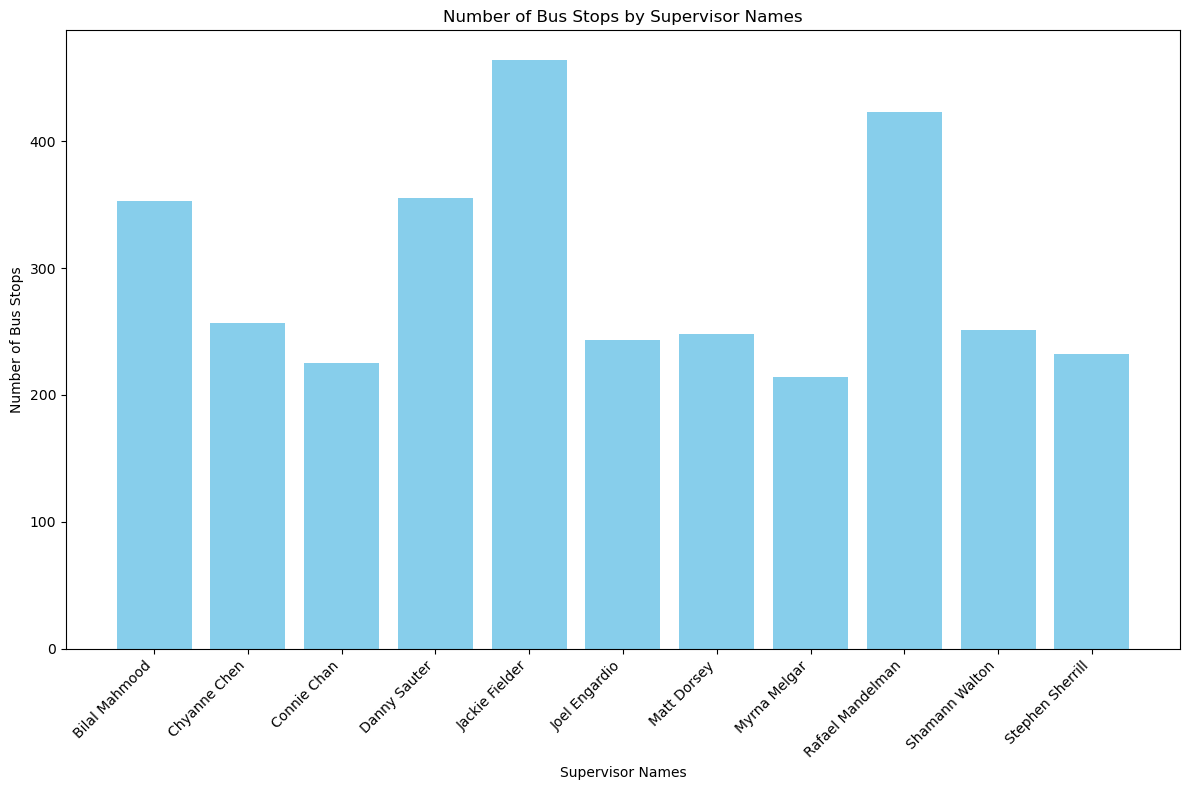

/tmp/ipykernel_1625/3380847894.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Supervisor Names', bbox_to_anchor=(1.05, 1), loc='upper left')


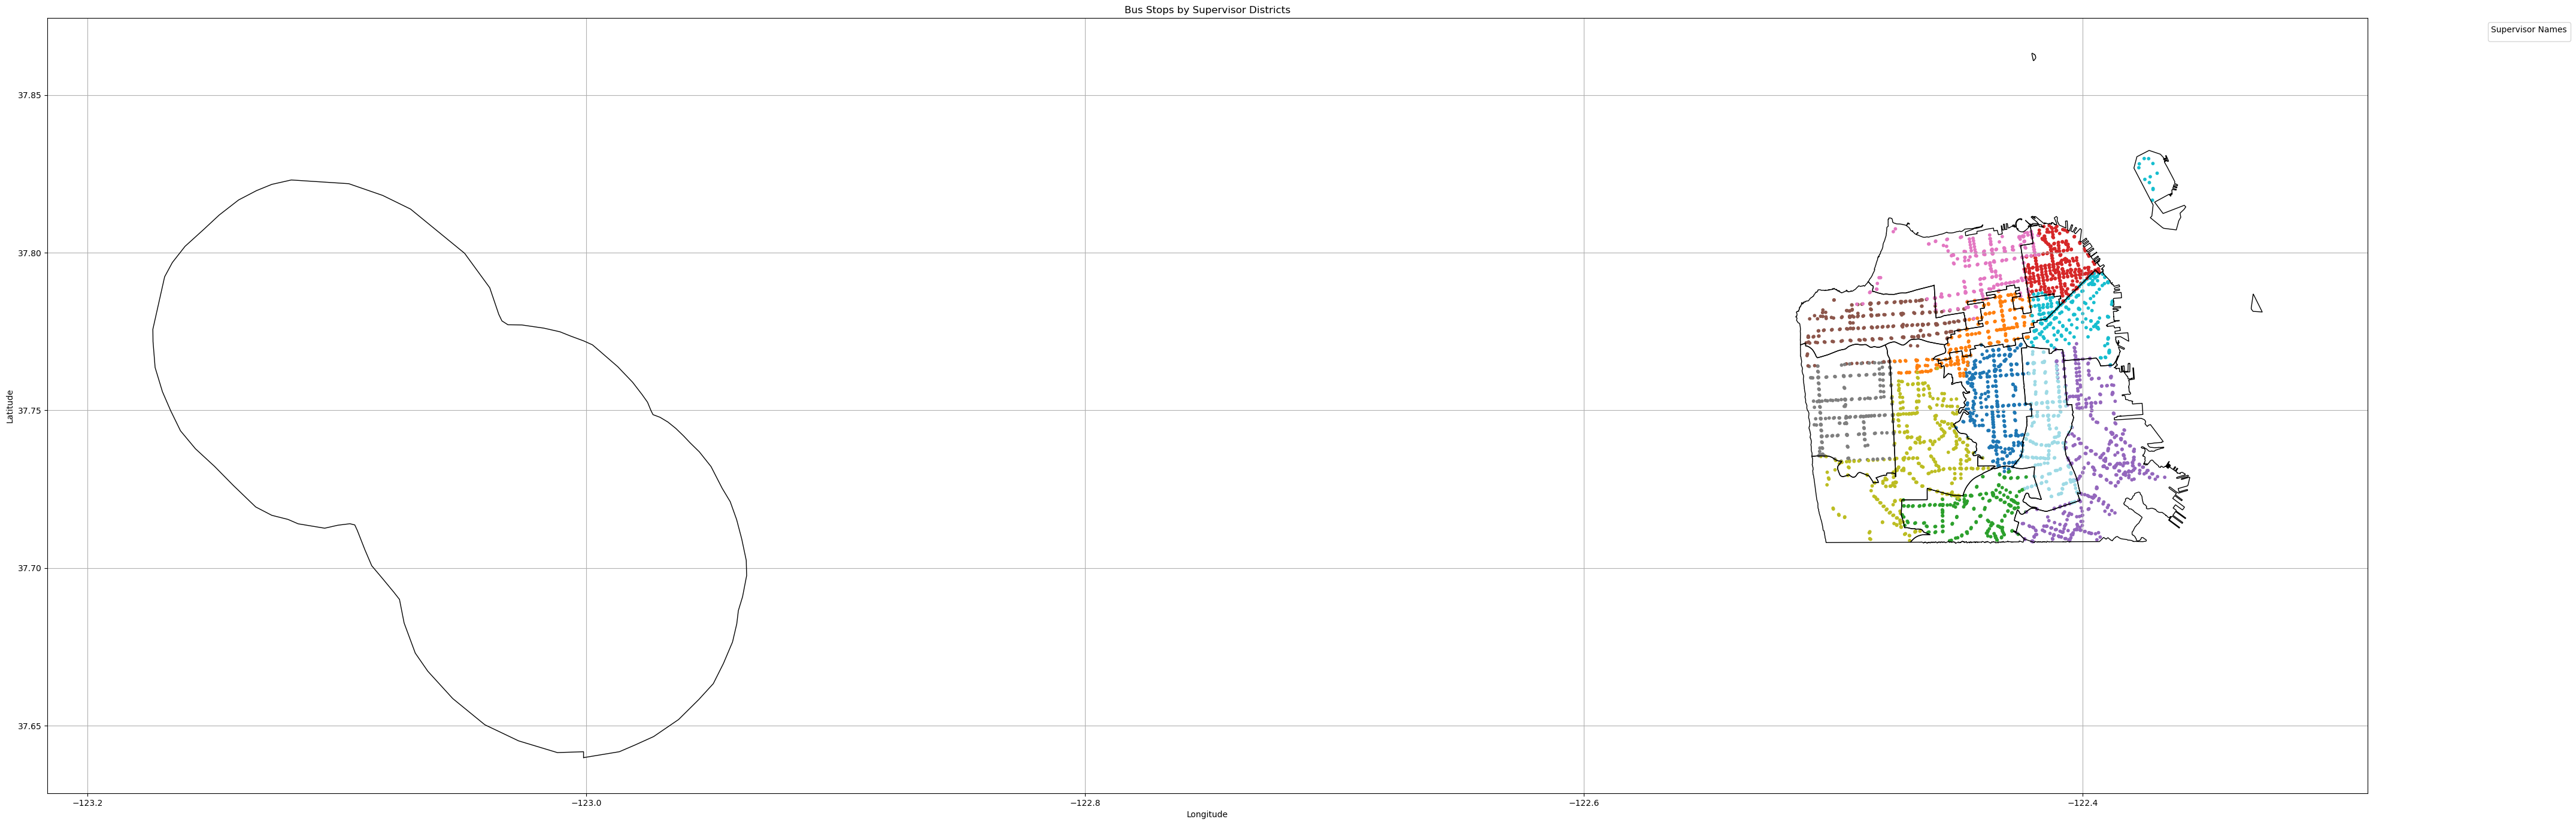

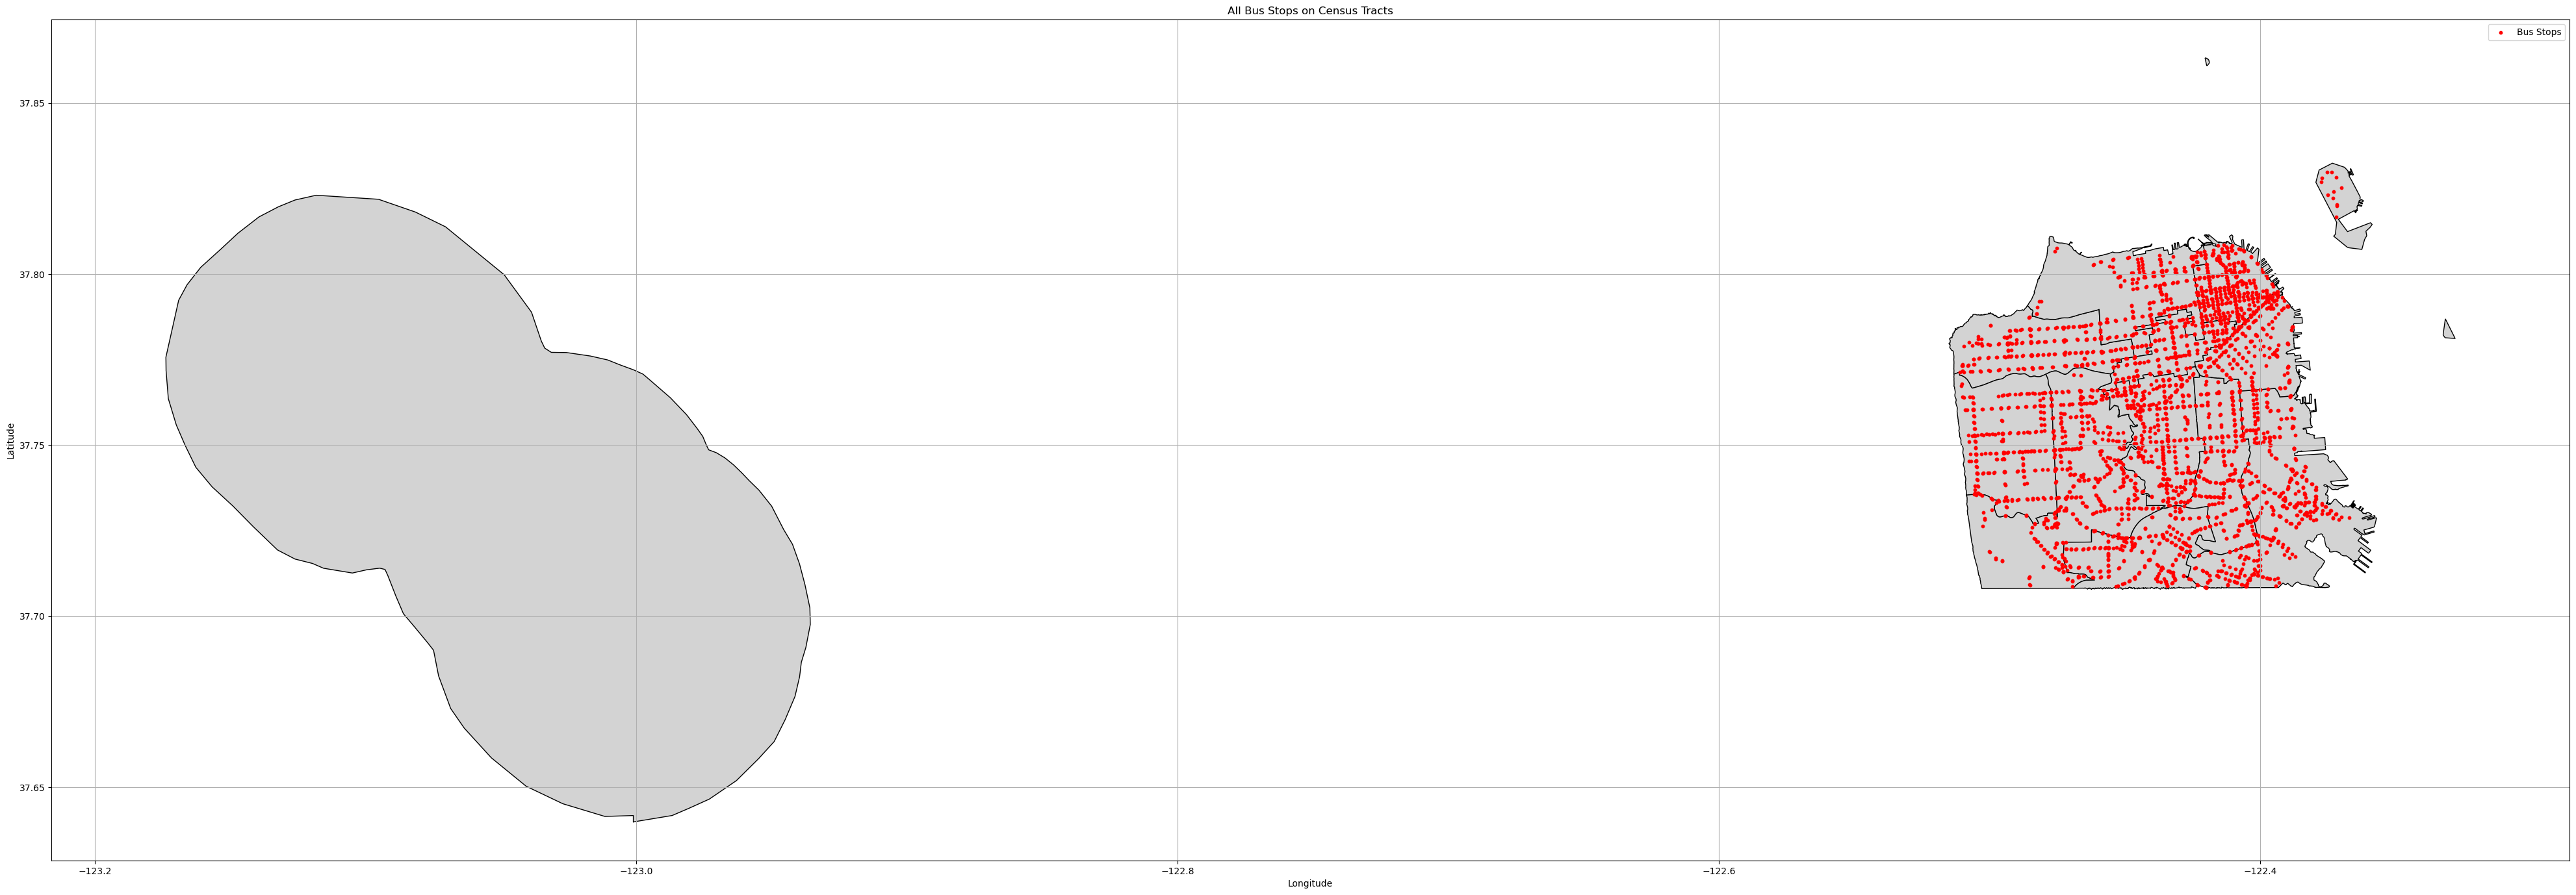

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the data
muni = pd.read_csv('Muni_Stops_20250126.csv')
tracts = gpd.read_file('Supervisor Districts (2022)_20250126.geojson')

# Convert to the same data type (string) and trim whitespaces
muni['Current Supervisor Districts'] = muni['Current Supervisor Districts'].astype(str).str.strip()
tracts['sup_dist_num'] = tracts['sup_dist_num'].astype(str).str.strip()

# Rename the column in tracts to match the muni DataFrame
tracts = tracts.rename(columns={'sup_dist_num': 'Current Supervisor Districts'})

# Merge the DataFrames
merged_df = pd.merge(muni, tracts, on='Current Supervisor Districts', how='inner')

# Convert bus stops DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(merged_df['LONGITUDE'], merged_df['LATITUDE'])]
geo_df = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Bar Graph: Number of bus stops per supervisor
bus_stops_by_supervisor = merged_df.groupby('sup_name').size().reset_index(name='Number of Bus Stops')

plt.figure(figsize=(12, 8))
plt.bar(bus_stops_by_supervisor['sup_name'], bus_stops_by_supervisor['Number of Bus Stops'], color='skyblue')
plt.xlabel('Supervisor Names')
plt.ylabel('Number of Bus Stops')
plt.title('Number of Bus Stops by Supervisor Names')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bus_stops_by_supervisor.png')
plt.show()

# Map: Bus stops divided by supervisor districts
fig, ax = plt.subplots(figsize=(20, 15))
tracts.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
geo_df.plot(column='sup_name', ax=ax, legend=True, markersize=10, cmap='tab20', marker='o')
plt.title('Bus Stops by Supervisor Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Supervisor Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('bus_stops_by_supervisor_districts.png')
plt.show()

# Map: All bus stops
fig, ax = plt.subplots(figsize=(100, 75))
tracts.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, markersize=10, color='red', marker='o', label='Bus Stops')
plt.title('All Bus Stops on Census Tracts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.savefig('all_bus_stops.png')
plt.show()

# Map: Supervisor districts with the bus stops
fig, ax = plt.subplots(figsize=(1, 15))
tracts.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, markersize=10, color='blue', marker='o', label='Bus Stops')
tracts.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
plt.title('Supervisor Districts with Bus Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.savefig('supervisor_districts_with_bus_stops.png')
plt.show()